# Import neccesary libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# explaination of the model
import shap

In [3]:
# Load the data
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# Check data types of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

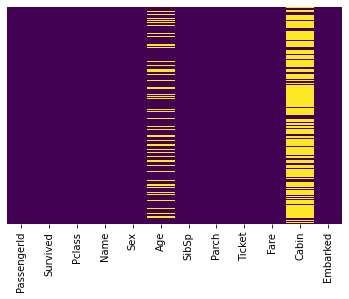

In [7]:
#Check null values in each feature
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

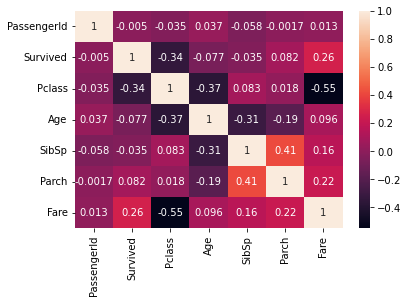

In [8]:
sns.heatmap(train_df.corr(), annot=True)

In [9]:
# Check for the distribution of data for each feature
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


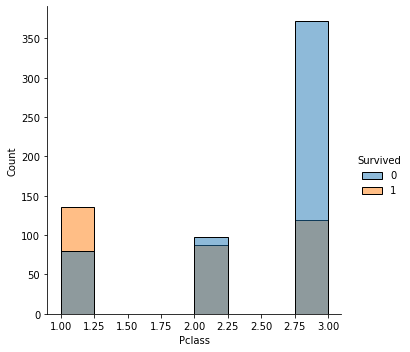

In [10]:
sns.displot(x='Pclass', bins=8,data=train_df, hue='Survived')

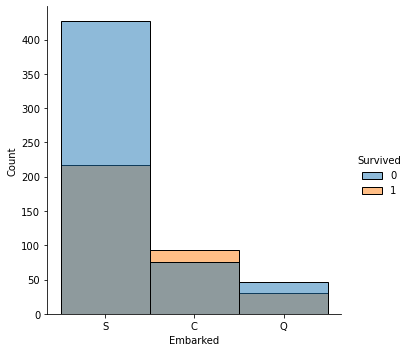

In [11]:
sns.displot(x='Embarked', bins=8,data=train_df, hue='Survived')

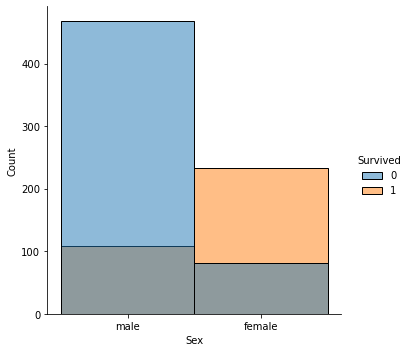

In [12]:
sns.displot(x='Sex', bins=8,data=train_df, hue='Survived')

In [13]:
#pipeline
def preprocessing(dataframe):
    try:
        dataframe = dataframe.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
        dataframe = pd.get_dummies(dataframe, columns=['Sex','Embarked','Pclass'])
        # Drop the columns with less information gain
        dataframe = dataframe.drop(['Pclass_2','Embarked_Q','Sex_female'], axis=1)
        dataframe['SibSp'].loc[dataframe['SibSp'] > 0]=1
        dataframe['Parch'].loc[dataframe['Parch'] > 0]=1
    except:
        pass

    return dataframe

In [14]:
# One-hot encoding of categorical features
train_df = train_df.pipe(preprocessing)




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:>

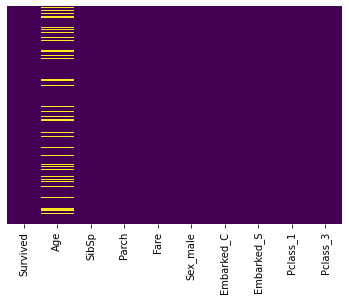

In [15]:
#Check null values in each feature
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

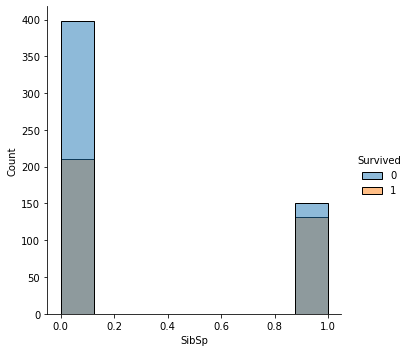

In [16]:
sns.displot(x='SibSp', bins=8,data=train_df, hue='Survived')

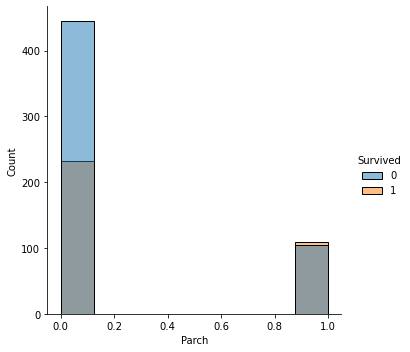

In [17]:
sns.displot(x='Parch', bins=8,data=train_df, hue='Survived')

<AxesSubplot:>

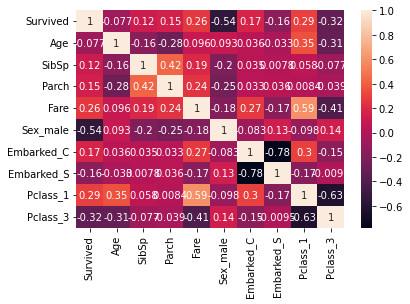

In [18]:
sns.heatmap(train_df.corr(), annot=True)

In [19]:
# Impute the missing values with the KNN algorithm
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(train_df)
# Create dataframe with data from imputer
train_df = pd.DataFrame(imputer.transform(train_df), columns=train_df.columns)

In [20]:
train_df.describe(include='all')

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,30.510853,0.317621,0.239057,32.204208,0.647587,0.188552,0.722783,0.242424,0.551066
std,0.486592,14.423568,0.465813,0.426747,49.693429,0.477990,0.391372,0.447876,0.428790,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Removing extreme values from the data

z = np.abs(stats.zscore(train_df))

In [22]:
threshold = 5
print('Number of outliers {x}'.format(x=np.where(z >= threshold)[0].shape[0]))


Number of outliers 3


In [23]:
# Remove the outliers
train_df = train_df[(z <= threshold).all(axis=1)]

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    888 non-null    float64
 1   Age         888 non-null    float64
 2   SibSp       888 non-null    float64
 3   Parch       888 non-null    float64
 4   Fare        888 non-null    float64
 5   Sex_male    888 non-null    float64
 6   Embarked_C  888 non-null    float64
 7   Embarked_S  888 non-null    float64
 8   Pclass_1    888 non-null    float64
 9   Pclass_3    888 non-null    float64
dtypes: float64(10)
memory usage: 76.3 KB


In [25]:
train_df.describe(include='all')

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,30.494561,0.318694,0.238739,30.582164,0.647523,0.185811,0.725225,0.239865,0.552928
std,0.486091,14.445182,0.466233,0.426553,41.176366,0.478011,0.389173,0.446652,0.427241,0.497471
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,38.250000,1.000000,0.000000,30.771850,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000


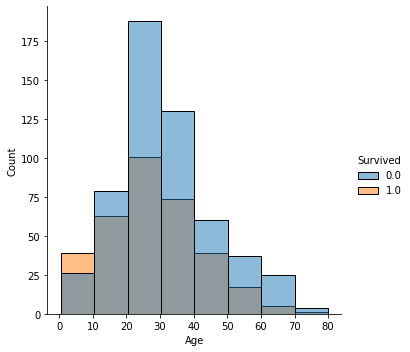

In [26]:
sns.displot(x='Age', bins=8,data=train_df, hue='Survived')


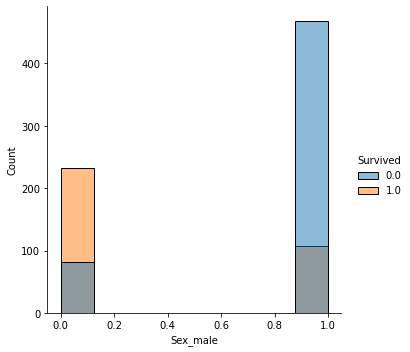

In [27]:
sns.displot(x='Sex_male', bins=8,data=train_df, hue='Survived')

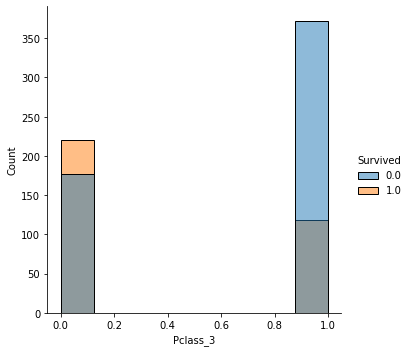

In [28]:
sns.displot(x='Pclass_3', bins=8,data=train_df, hue='Survived')

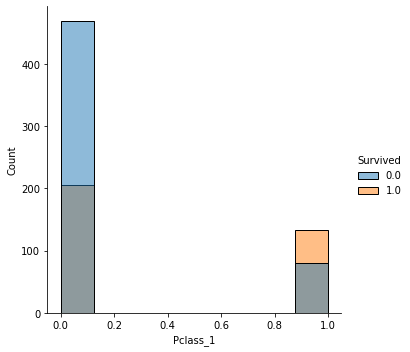

In [29]:
sns.displot(x='Pclass_1', bins=8,data=train_df, hue='Survived')

<AxesSubplot:>

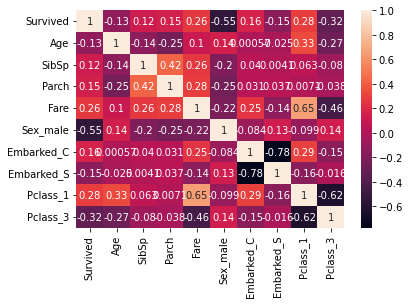

In [30]:
sns.heatmap(train_df.corr(), annot=True)

In [31]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = train_df.loc[:, train_df.columns!='Survived']
vif = pd.DataFrame()
vif["features"] = features.columns
vif["vif_Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,vif_Factor
0,Age,4.968294
1,SibSp,1.829829
2,Parch,1.819668
3,Fare,3.187944
4,Sex_male,3.249480
5,Embarked_C,2.249296
6,Embarked_S,5.249780
7,Pclass_1,3.377605
8,Pclass_3,2.823586


In [32]:
features = train_df.loc[:, train_df.columns!='Survived']

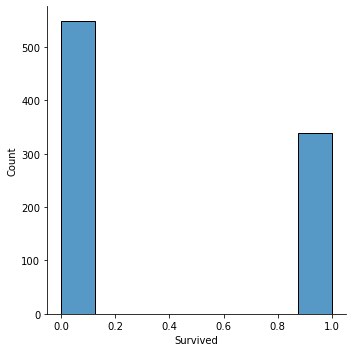

In [33]:
sns.displot(x='Survived', bins=8,data=train_df)

In [34]:
# Calculte the mutual information scores for each feature
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_train = train_df.loc[:, train_df.columns != 'Survived']
y_train=train_df['Survived']
mi_scores = make_mi_scores(X_train, y_train)
mi_scores[::3]  # show a few features with their MI scores


Fare        0.132259
Pclass_3    0.056955
SibSp       0.008242
Name: MI Scores, dtype: float64

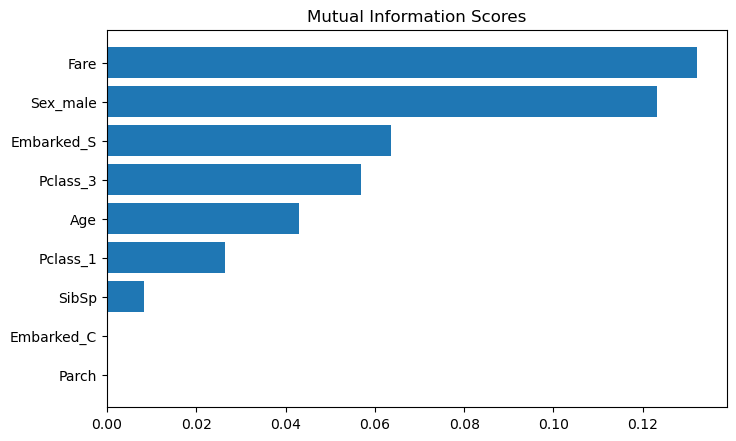

In [35]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

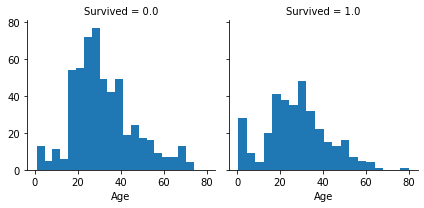

In [36]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

The `size` parameter has been renamed to `height`; please update your code.


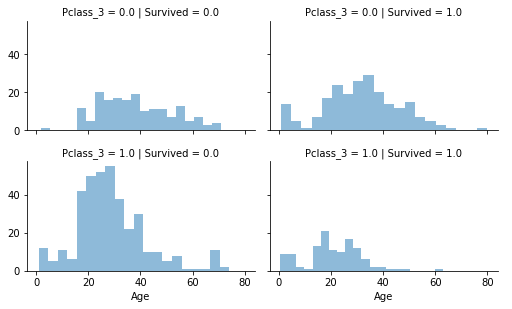

In [37]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass_3', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The `size` parameter has been renamed to `height`; please update your code.
Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.


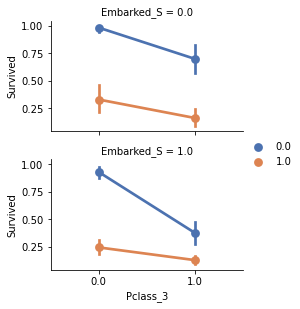

In [38]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked_S', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass_3', 'Survived', 'Sex_male', palette='deep')
grid.add_legend()

The `size` parameter has been renamed to `height`; please update your code.
Using the barplot function without specifying `order` is likely to produce an incorrect plot.


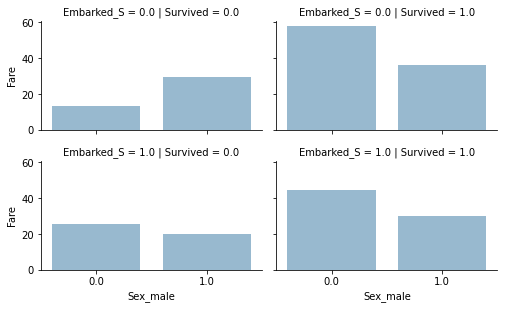

In [39]:

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked_S', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex_male', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [40]:
from sklearn.model_selection import train_test_split
X = train_df.loc[:, train_df.columns != "Survived"]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [41]:
# standarize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Support Vector Machines

grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svc = GridSearchCV(estimator=SVC(), param_grid=grid,cv=5,)
svc.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_test_pred=svc.predict(X_test)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       373
         1.0       0.88      0.65      0.75       221

    accuracy                           0.84       594
   macro avg       0.85      0.80      0.82       594
weighted avg       0.84      0.84      0.83       594



In [52]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       176
         1.0       0.90      0.67      0.77       118

    accuracy                           0.84       294
   macro avg       0.85      0.81      0.82       294
weighted avg       0.85      0.84      0.83       294



In [53]:
# KNN classifier
grid = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}
KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= 5)
KNN.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_test_pred=svc.predict(X_test)
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       373
         1.0       0.88      0.65      0.75       221

    accuracy                           0.84       594
   macro avg       0.85      0.80      0.82       594
weighted avg       0.84      0.84      0.83       594



In [54]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       176
         1.0       0.90      0.67      0.77       118

    accuracy                           0.84       294
   macro avg       0.85      0.81      0.82       294
weighted avg       0.85      0.84      0.83       294



In [55]:
# Random Forest

grid = { 
    'n_estimators': [25,50,75,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
y_train_pred = svc.predict(X_train)
y_test_pred=svc.predict(X_test)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       373
         1.0       0.88      0.65      0.75       221

    accuracy                           0.84       594
   macro avg       0.85      0.80      0.82       594
weighted avg       0.84      0.84      0.83       594



In [56]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       176
         1.0       0.90      0.67      0.77       118

    accuracy                           0.84       294
   macro avg       0.85      0.81      0.82       294
weighted avg       0.85      0.84      0.83       294



In [390]:
# explain all the predictions in the test setç
# initialize javascript visualization
shap.initjs()

explainer = shap.KernelExplainer(rf_cv.predict_proba, X_train)
shap_values = explainer.shap_values(X_test[1:2])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[1:2])

Using 594 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]